Brief introduction to PyTorch. This was entirely based on the references, for more detailed information check them out.

# Contents
## Part I: The (very) basics
- [PyTorch Workflow](#PyTorch-Workflow-⇧)
- [Tensors](#Tensors-⇧)
  - [Basics](#Basics-⇧)
  - [Operations](#Operations-⇧)
  - [CPU x GPU](#CPU-x-GPU-⇧)

## Part II: Image Classification with Pre-trained Models
- [Model Inference](#Model-Inference-⇧)
- [AlexNet for Image Classification](#AlexNet-for-Image-Classification-⇧)


[References](#References-⇧)

---

# Part I: The (very) Basics
In this section a introduction to (one of) PyTorch's core object - the Tensor - is presented.

## PyTorch Workflow [⇧](#Contents)

![PyTorch Workflow](../_assets/pytorch_workflow.png)

## Tensors [⇧](#Contents)

Tensors can be thought as n-dimensional matrices. In the codes below, we'll create some tensors, in order to check some possibilities.

In [8]:
import torch

### Basics  [⇧](#Contents)

In [9]:
# 1-dimensional tensor
print(torch.ones(3))
print(torch.zeros(3))

t = torch.tensor([1, 2, 4.3])
print(t)

tensor([1., 1., 1.])
tensor([0., 0., 0.])
tensor([1.0000, 2.0000, 4.3000])


In [10]:
# 2-dimensional tensor
print(torch.ones(3, 2))
print(torch.zeros(2, 3))
print(torch.tensor([
    [1, 2, 4.3],
    [6, 2.12512, 5]
]))

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1.0000, 2.0000, 4.3000],
        [6.0000, 2.1251, 5.0000]])


and so on.

In [11]:
# tensor shape
t.shape

torch.Size([3])

In [12]:
# tensor element access
t[2]

tensor(4.3000)

Tensor manipulation is very similar to NumPy array manipulation. For more information check [PyTorch tensor documentation](https://pytorch.org/docs/stable/torch.html#tensors).

### Operations [⇧](#Contents)

Tensors support element-wise operations:

In [13]:
a = torch.tensor([
    [1, 2, 3],
    [4, 5, 6]
])
b = torch.tensor([
    [-1, -2, 1],
    [-1, -2, -3]
])

In [14]:
print(a + b)
print(a - b)
print(a // b)
print(a * b)
print(a * 2)

tensor([[0, 0, 4],
        [3, 3, 3]])
tensor([[2, 4, 2],
        [5, 7, 9]])
tensor([[-1, -1,  3],
        [-4, -2, -2]])
tensor([[ -1,  -4,   3],
        [ -4, -10, -18]])
tensor([[ 2,  4,  6],
        [ 8, 10, 12]])


### CPU x GPU [⇧](#Contents)

PyTorch allows creating tensors to operate on a GPU. Google Collab may be used to operate with GPU.

In [15]:
# CPU
tensor_cpu = torch.tensor([
    [-1, -2, 1],
    [-1, -2, -3]
], device="cpu")

# GPU
tensor_gpu = torch.tensor([
    [-1, -2, 1],
    [-1, -2, -3]
], device="cuda")

AssertionError: 
Found no NVIDIA driver on your system. Please check that you
have an NVIDIA GPU and installed a driver from
http://www.nvidia.com/Download/index.aspx

In [ ]:
# moving from one device to another
t_cpu_gpu = tensor_cpu.to(device="cuda")

---

# Part II: Image Classification with Pre-trained Models

TorchVision package comes with pre-trained (using the ImageNet dataset) models that may be used for image classification. In this section we'll be learning how to do that.

## Model Inference [⇧](#Contents)
Model inference is the process of getting information (predictions) based in an already trained model. Roughly speaking, the process is: 
```
input image → trained model → output predictions
```

In [17]:
# import torchvision models
from torchvision import models

# transforms
from torchvision import transforms

## AlexNet for Image Classification [⇧](#Contents)

In [18]:
# load pre-trained model
alexnet = models.alexnet(pretrained=True)

In [19]:
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [20]:
# perform image transforms to fit the image to the format used in training

transform = transforms.Compose([
    transforms.Resize(256),      # to 256x256
    transforms.CenterCrop(224),  # roi of 224x224 centered in image
    transforms.ToTensor(),
    transforms.Normalize(        # set mean and std to the specified values
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ),
])

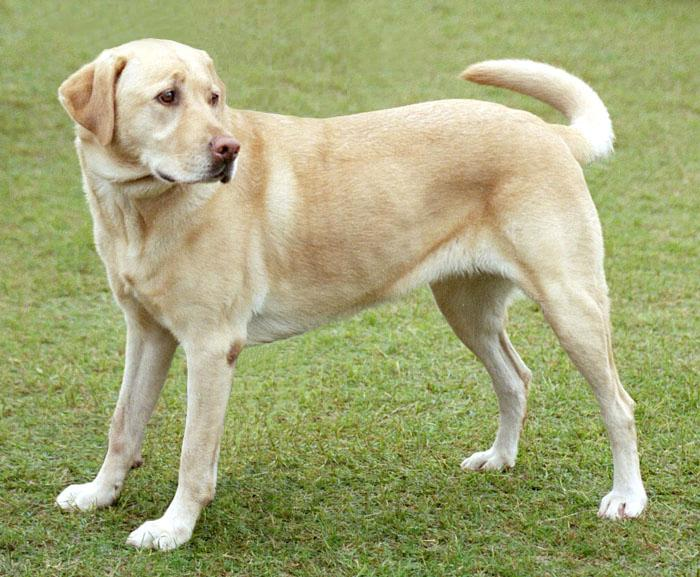

In [21]:
# load image
from PIL import Image

img = Image.open("../_assets/dog.jpg")
img

In [22]:
# pre-process image
img_t = transform(img) # apply previously defined transforms
batch_t = torch.unsqueeze(img_t, 0)

In [24]:
# infer model
alexnet.eval() # set network to eval mode

out = alexnet(batch_t)
out.shape

torch.Size([1, 1000])

In [32]:
# load ImageNet classes' names
with open('../_assets/imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]

In [40]:
# output the most confident class
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100

print(classes[index[0]], "{:.3f}%".format(percentage[index[0]].item()))

Labrador retriever 42.467%


In [41]:
# output a list of the top N confident classes
n = 5
_, indices = torch.sort(out, descending=True)

for i in indices[0][:n]:
    print(classes[i], "{:.3f}%".format(percentage[i].item()))

Labrador retriever 42.467%
golden retriever 16.609%
Saluki, gazelle hound 15.474%
whippet 2.788%
Ibizan hound, Ibizan Podenco 2.362%


Other pre-trained models, such as ResNet, MobileNet... may be used. For more information about pre-trained models available on TorchVision, check out the [documentation](https://pytorch.org/docs/stable/torchvision/models.html).

# References [⇧](#Contents)

[1] [PyTorch for Beginners: Basics](https://www.learnopencv.com/pytorch-for-beginners-basics/)

[2] [PyTorch for Beginners: Image Classification using Pre-trained models](https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/)